**Работа с библиотеками pandas и sklearn**


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [154]:
pd.options.mode.chained_assignment = None # Отключем предупреждение 
                                          # о присваивании копии DataFrame
pd.options.display.max_columns = None # Отображаем все столбцы
pd.options.display.max_rows = None # Отоюражаем все строки
pd.options.display.float_format = '{:.2f}'.format

***Исследование данных***

In [155]:
# Загрузка данных
df = pd.read_csv('coffee_analysis.csv', delimiter=",")

In [156]:
# Проверка типа
type(df)

pandas.DataFrame

In [157]:
df.head()

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review
0,565e9123c6554a48bd0fb1fdc3cd2227,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,"95,0",November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",cite
1,813a7c786bdf42d6b14e9b489c4ce108,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,"92,0",November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",cite
2,ba6670beda0447499ca11fae5c98c113,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,"92,0",November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",cite
3,baca66cf2ad942b39780e4dbd59138c3,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,"94,0",November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",cite
4,5083c797d68a40e29ccdd6919efe4fc8,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Odo Shakiso District,Guji Zone,5.14,"93,0",November 2017,"Delicate, richly and sweetly tart. Dried hibis...",cite


In [158]:
# Преобразуем столбец в числовой формат
df['rating'] = df['rating'].str.replace(',', '.').astype(float)

In [159]:
df.tail()

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review
1991,cb19d7b9d06a4991845fb8ee418bcdf8,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Lake Atitlán,Guatemala,4.70,92.00,November 2022,"Crisply sweet, nut-toned. Almond brittle, pie ...",cite
1992,4c9d27ec5fa74f42af56c6b2e4d764c0,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Antigua Growing Region,Guatemala,2.94,93.00,November 2022,"Chocolaty, floral-framed. Cocoa nib, honeysuck...",cite
1993,9012c5e219304dd9bd47554f6a534bb2,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Antigua Growing Region,Guatemala,2.94,93.00,November 2022,"High-toned, enticingly sweet. Black cherry, na...",cite
1994,c5caf3e492ab4c92b50083a04848d256,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Lake Atitlán,Guatemala,4.70,93.00,November 2022,"Vibrantly sweet, subtly nuanced. Apricot, dar...",cite
1995,cec117f550f64b2cb4879324743c85f4,Espresso No. 3,El Gran Cafe,Medium-Light,Guatemala,Antigua Growing Region,Guatemala,5.88,94.00,November 2022,"Evaluated as espresso. Multi-layered, complex....",cite


In [160]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            1996 non-null   str    
 1   name           1996 non-null   str    
 2   roaster        1996 non-null   str    
 3   roast          1984 non-null   str    
 4   loc_country    1996 non-null   str    
 5   origin_1       1996 non-null   str    
 6   origin_2       1996 non-null   str    
 7   100g_USD       1988 non-null   float64
 8   rating         1996 non-null   float64
 9   review_date    1996 non-null   str    
 10  desc_1         1996 non-null   str    
 11  source_review  1996 non-null   str    
dtypes: float64(2), str(10)
memory usage: 187.3 KB


In [161]:
df.describe()

,100g_USD,rating
count,1988.00,1996.00
mean,9.21,93.13
std,11.48,1.54
min,0.17,84.00
25%,4.93,92.00
50%,5.86,93.00
75%,8.48,94.00
max,132.28,98.00


In [162]:
df.shape

(1996, 12)

In [163]:
df.drop_duplicates(inplace=True)

In [164]:
# разделяем данные на обучающую и тестовую выборки
train, test = train_test_split(
    df,
    test_size=0.2, # доля тествой выборки
    random_state=1 # для воспроизводимости результата
)

# выводим размерности полученных выборок
print("Размерность тренировочной выборки:", train.shape)
print("Размерность тестовой выборки:", test.shape)

Размерность тренировочной выборки: (1596, 12)
Размерность тестовой выборки: (400, 12)


***Виды признаков***

*Предобработка признаков*

Обработка выбрасов

In [165]:
# Метод межевартильного размаха

# создаем DataFrame
df_new = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 100],
    'col2': [10, 20, 30, 40, 50, 1000],
})

# Определяем квартили для столбца col1
Q1 = df_new['col1'].quantile(0.25)
Q3 = df_new['col1'].quantile(0.75)
IQR = Q3 - Q1

# Удаляем выбросы
df_new = df_new[(df_new['col1'] >= Q1 - 1.5 * IQR) 
                & (df_new['col1'] <= Q1 + 1.5 * IQR)]

df_new

,col1,col2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [166]:
# Удаление выбросов на основе статистических критериев

df_new = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 100],
    'col2': [10, 20, 30, 40, 50, 1000],
})

# Удаляем выбросы
df_new = df_new[(np.abs(scipy.stats.zscore(df_new['col1'])) < 3)] # удаляем 
                                                    # выбросы в столбце 'col1'

df_new                                                   

,col1,col2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,100,1000


Заполнение пропущенных значений

In [167]:
df.isnull().sum()

uid               0
name              0
roaster           0
roast            12
loc_country       0
origin_1          0
origin_2          0
100g_USD          8
rating            0
review_date       0
desc_1            0
source_review     0
dtype: int64

In [168]:
# df.dropna(how="any", inplace=True)
# Удаляем строки, в которых есть не менее 5 пропущенных значений
train.dropna(thresh=5, inplace=True)
test.dropna(thresh=5, inplace=True)

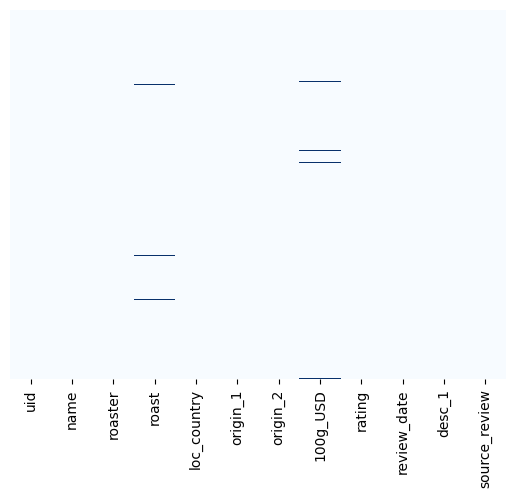

In [169]:
# Визуализация пропущенных значений в обучающей выборке
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="Blues")
plt.show()

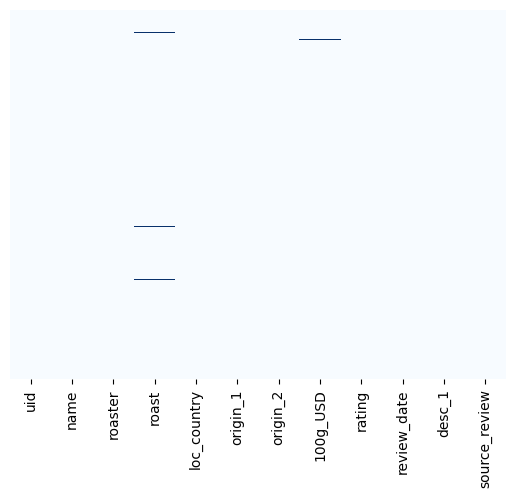

In [170]:
# Визуализация пропущенных значений в тестовой выборке
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="Blues")
plt.show()

In [171]:
# Заполняем пропущенные значения средним значением по столбцу
mean_values = train.mean(numeric_only=True)

train.fillna(mean_values, inplace=True)
test.fillna(mean_values, inplace=True)

pass

In [172]:
train.isnull().sum()

uid              0
name             0
roaster          0
roast            9
loc_country      0
origin_1         0
origin_2         0
100g_USD         0
rating           0
review_date      0
desc_1           0
source_review    0
dtype: int64

In [173]:
test.isnull().sum()

uid              0
name             0
roaster          0
roast            3
loc_country      0
origin_1         0
origin_2         0
100g_USD         0
rating           0
review_date      0
desc_1           0
source_review    0
dtype: int64

Преобразование данных в числовой формат

In [174]:
df_new = pd.DataFrame({'A': ['1', '2', '3'], 'B': ['4', '5', '6']})
df_new['A'] = df_new['A'].astype(int)
df_new.info()

<class 'pandas.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      str  
dtypes: int64(1), str(1)
memory usage: 244.0 bytes


In [175]:
df_new = pd.DataFrame({'A': ['1', '2', '3'], 'B': ['4', '5', '6']})
df_new['A'] = pd.to_numeric(df_new['A'], errors='coerce')
df_new.info()

<class 'pandas.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      str  
dtypes: int64(1), str(1)
memory usage: 244.0 bytes


*Нормализация и масштабирование признаков*

Нормализация (MinMax нормализация)

In [176]:
scaler = MinMaxScaler(feature_range=(0, 1))
train['100g_USD'] = scaler.fit_transform(train['100g_USD'].values.
                                         reshape(-1, 1))
train['100g_USD'].describe()

count   1596.00
mean       0.07
std        0.08
min        0.00
25%        0.04
50%        0.05
75%        0.07
max        1.00
Name: 100g_USD, dtype: float64

In [177]:
test['100g_USD'] = scaler.fit_transform(test['100g_USD'].values.
                                         reshape(-1, 1))
test['100g_USD'].describe()

count   400.00
mean      0.07
std       0.12
min       0.00
25%       0.03
50%       0.03
75%       0.06
max       1.00
Name: 100g_USD, dtype: float64

Стандартизация

In [178]:
scaler = StandardScaler()
train['rating'] = scaler.fit_transform(train['rating'].values.
                                         reshape(-1, 1))
train['rating'].describe()

count   1596.00
mean       0.00
std        1.00
min       -5.87
25%       -0.72
50%       -0.07
75%        0.57
max        3.15
Name: rating, dtype: float64

In [179]:
test['rating'] = scaler.transform(test['rating'].values.
                                         reshape(-1, 1))
test['rating'].describe()

count   400.00
mean      0.05
std       0.96
min      -3.93
25%      -0.72
50%      -0.07
75%       0.57
max       2.50
Name: rating, dtype: float64

***Преобразование категориальных признаков***

Оne-hot encoding

In [180]:
# Выполняем one-hot encoding на train и test наборах данных
# Используем параметр columns для указания списка столбцов, которые нужно 
# преобразовать
train = pd.get_dummies(train, columns=['source_review'])
test = pd.get_dummies(test, columns=['source_review'])

# Выравниваем наборы столбцов-индикаторов в train и test DataFrame,
# чтобы обеспечить одинаковый набор столбцов в обоих наборах данных
train, test = train.align(test, join='outer', axis=1, fill_value=0)

In [181]:
train.head()

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review_cite
0,565e9123c6554a48bd0fb1fdc3cd2227,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,0.11,1.21,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",True
813,d9a450e6ed164f3e89ef44927de653b3,"Classic Blend (FTO, RFA)",Wheelys Cafe Taiwan,Medium,Taiwan,Indonesia,Costa Rica,0.05,-0.07,August 2020,"Evaluated as espresso. Deeply sweet, cocoa and...",True
1152,459133aad646437e98d8120e0d68f8b9,Ethiopia Guji Hambela G1 Natural,RanGuo Coffee,Medium-Light,Taiwan,Guji Zone,Oromia Region,0.04,-1.36,March 2021,"Balanced, sweet-toned. Date, baking chocolate,...",True
361,b7e066d443024a10b1b98daf7edd5998,Specialty Coffee Blend Espresso,Choosy Gourmet,Medium-Light,Taiwan,Ethiopia,Colombia,0.01,-0.07,January 2019,"Evaluated as espresso. Rich, chocolaty, sweetl...",True
1725,1862ccb5a4f5487f946975be818056ba,Ethiopia Guji Shakiso G1 Honey,VERYTIME,Medium-Light,Taiwan,Sidama Region,Southern Ethiopia,0.04,0.57,May 2022,"Fruit-toned, deeply floral. Raspberry, wisteri...",True


In [182]:
train.info()

<class 'pandas.DataFrame'>
Index: 1596 entries, 0 to 1061
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uid                 1596 non-null   str    
 1   name                1596 non-null   str    
 2   roaster             1596 non-null   str    
 3   roast               1587 non-null   str    
 4   loc_country         1596 non-null   str    
 5   origin_1            1596 non-null   str    
 6   origin_2            1596 non-null   str    
 7   100g_USD            1596 non-null   float64
 8   rating              1596 non-null   float64
 9   review_date         1596 non-null   str    
 10  desc_1              1596 non-null   str    
 11  source_review_cite  1596 non-null   bool   
dtypes: bool(1), float64(2), str(9)
memory usage: 151.2 KB


In [183]:
test.info()

<class 'pandas.DataFrame'>
Index: 400 entries, 608 to 1816
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uid                 400 non-null    str    
 1   name                400 non-null    str    
 2   roaster             400 non-null    str    
 3   roast               397 non-null    str    
 4   loc_country         400 non-null    str    
 5   origin_1            400 non-null    str    
 6   origin_2            400 non-null    str    
 7   100g_USD            400 non-null    float64
 8   rating              400 non-null    float64
 9   review_date         400 non-null    str    
 10  desc_1              400 non-null    str    
 11  source_review_cite  400 non-null    bool   
dtypes: bool(1), float64(2), str(9)
memory usage: 37.9 KB


Label encoding

In [184]:
# Создаем экземпляр класса LabelEncoder()
le = LabelEncoder()

combined = pd.concat([train['origin_1'], test['origin_1']])
le.fit(combined)

train['origin_1'] = le.transform(train['origin_1'])
test['origin_1'] = le.transform(test['origin_1'])

In [185]:
train.head()

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review_cite
0,565e9123c6554a48bd0fb1fdc3cd2227,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,322,Ethiopia,0.11,1.21,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",True
813,d9a450e6ed164f3e89ef44927de653b3,"Classic Blend (FTO, RFA)",Wheelys Cafe Taiwan,Medium,Taiwan,180,Costa Rica,0.05,-0.07,August 2020,"Evaluated as espresso. Deeply sweet, cocoa and...",True
1152,459133aad646437e98d8120e0d68f8b9,Ethiopia Guji Hambela G1 Natural,RanGuo Coffee,Medium-Light,Taiwan,157,Oromia Region,0.04,-1.36,March 2021,"Balanced, sweet-toned. Date, baking chocolate,...",True
361,b7e066d443024a10b1b98daf7edd5998,Specialty Coffee Blend Espresso,Choosy Gourmet,Medium-Light,Taiwan,139,Colombia,0.01,-0.07,January 2019,"Evaluated as espresso. Rich, chocolaty, sweetl...",True
1725,1862ccb5a4f5487f946975be818056ba,Ethiopia Guji Shakiso G1 Honey,VERYTIME,Medium-Light,Taiwan,395,Southern Ethiopia,0.04,0.57,May 2022,"Fruit-toned, deeply floral. Raspberry, wisteri...",True


In [186]:
test.head()

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review_cite
608,66415071407e43f2ac58a29b87882f7d,La Lindura Colombia,JBC Coffee Roasters,Medium-Light,United States,124,Tolima Department,0.03,-0.72,December 2019,"Cocoa-toned, richly sweet. Cocoa nib, apricot,...",True
1695,4fa989ed1d0d4629af37f92dd6214ac9,Costa Rica Anaerobic Cordillera de Fuego,RamsHead Coffee Roasters,Medium-Light,United States,417,Costa Rica,0.03,-0.07,April 2022,"Deeply sweet-savory, spice-toned. Watermelon, ...",True
790,07af91b927424e84b910947f6126cf27,Sweet Diary Espresso,Choosy Gourmet,Medium,Taiwan,108,Ethiopia,0.03,-1.36,July 2020,"Evaluated as espresso. Deeply sweet, chocolate...",True
650,f8c11fe1a383461c9f4168c446493ac7,Lian House Blend Espresso,Creation Food Co.,Medium,Taiwan,330,Colombia,0.02,-2.00,February 2020,"Evaluated as espresso. Sweetly nut-toned, choc...",True
1634,7b3759fff4524fb89c9b533e704a9a30,Nicaragua Sabino Maria,Nostalgia Coffee Roasters,Medium-Light,United States,192,Nicaragua,0.04,-0.07,March 2022,"Crisply sweet, cocoa-toned. Cocoa nib, red plu...",True


Mean encoding (target encoding)

In [187]:
df_new = pd.DataFrame({'category': ['A', 'B', 'A', 'B', 'C', 'C', 'C', 'B'],
                       'target': [1, 0, 1, 0, 1, 0 , 1, 0]
                       })

# Расчет среднего значения целевой пермеменной для каждой категории
mean_target = df_new.groupby('category')['target'].mean()

# Отоображение среднего значения целевой переменной для каждой категории 
# в DataFrame
df_new['category_mean'] = df_new['category'].map(mean_target)

df_new

,category,target,category_mean
0,A,1,1.00
1,B,0,0.00
2,A,1,1.00
3,B,0,0.00
4,C,1,0.67
5,C,0,0.67
6,C,1,0.67
7,B,0,0.00


Frequency Encoding

In [188]:
df_new = pd.DataFrame({'category': ['A', 'B', 'A', 'B', 'C', 'C', 'C', 'B']})

# Получение частот каждой категории в столбце 'category'
freq = df_new['category'].value_counts(normalize=True)

# Отоображение частот для каждой категории в DataFrame
df_new['category_freq'] = df_new['category'].map(freq)   

df_new

,category,category_freq
0,A,0.25
1,B,0.38
2,A,0.25
3,B,0.38
4,C,0.38
5,C,0.38
6,C,0.38
7,B,0.38


***Создание новых признаков***

*Инженерия признаков на основе знаний об отрасли*

In [189]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female


In [190]:
# Создание нового признака
penguins_data['bill_ratio'] = penguins_data['bill_depth_mm'] / penguins_data['bill_length_mm']
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male,0.48
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female,0.44
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female,0.45
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female,0.53


*Преобразование существующих признаков*

In [191]:
# Создание нового признака
penguins_data['body_mass_kg'] = penguins_data['body_mass_g'] / 1000
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio,body_mass_kg
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male,0.48,3.75
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female,0.44,3.80
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female,0.45,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female,0.53,3.45


*Отбор признаков*

In [192]:
# Загрузка данных
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [193]:
# X: содержит 4 признака ирисов (длина/ширина чашелистика и лепестка)

# y: содержит метки классов (0=setosa, 1=versicolor, 2=virginica)
X = data.data
y = data.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [194]:
# Отбор признаков с помощью RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, 
                                                  random_state=42))
selector.fit(X, y)

# Вывод наиболее значимых признаков
# Получаем индексы выбранных признаков
selected_indices = selector.get_support(indices=True)
feature_importance = selector.estimator_.feature_importances_
feature_names = data.feature_names
for i in selector.get_support(indices=True):
    print(feature_names[i], feature_importance[i])

petal length (cm) 0.4361295069034437
petal width (cm) 0.43606478004168353


Что это значит на практике:

Входные данные (4 признака):
sepal length (cm),
sepal width (cm),
petal length (cm),
petal width (cm),

После отбора (2 признака):
petal length (cm) - важность 0.43613,
petal width (cm) - важность 0.43606

Логика отбора:
RandomForest определил, что длина и ширина лепестка наиболее важны.
Длина и ширина чашелистика имеют меньшую важность и отфильтрованы.
Порог отбора = средняя важность.
Признаки с важностью > cредняя важность